# open Irma ensemble datasets as OpenDAP links 

- on [weather server](https://weather.rsmas.miami.edu/repository/entry/show?entryid=88c07b73-cf8d-4426-9254-16c8e75c2811), click and grab OpenDAP link for your initialization time

- consider [xclim](https://xclim.readthedocs.io/en/stable/notebooks/ensembles.html) tools for ensemble processing (later)?

In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# on weather server, i extracted two OpenDAP URLs with copy-paste
# These two are for GEFS_Global_1p0deg_Ensemble_20170904_1800.grib2 <-- this is fcst initialization time

# Full ensemble (21 members): 
URLens = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV8yMDE3MDkwNF8xODAwLmdyaWIy/entry.das'

# Derived (mean and stdev and stuff)
URLder = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV9kZXJpdmVkXzIwMTcwOTA0XzE4MDAuZ3JpYjI%3D/entry.das'


In [4]:
#URLname = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV8yMDE3MDkwNF8xODAwLmdyaWIy/entry.das'
#URLname = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV9kZXJpdmVkXzIwMTcwOTA0XzE4MDAuZ3JpYjI%3D/entry.das'
ds = xr.open_dataset(URLens)

In [5]:
ds

<xarray.Dataset>
Dimensions:                                                              (
                                                                          lat: 181,
                                                                          lon: 360,
                                                                          time: 64,
                                                                          time_bounds_1: 2,
                                                                          time1: 2,
                                                                          ...
                                                                          isobaric1: 12,
                                                                          depth_below_surface_layer: 1,
                                                                          depth_below_surface_layer_bounds_1: 2,
                                                                          height_above_ground1: 1,
                                                                          isobaric2: 10,
                                                                          ens: 21)
Coordinates: (12/14)
  * lat                                                                  (lat) float32 ...
  * lon                                                                  (lon) float32 ...
    reftime                                                              datetime64[ns] ...
  * time                                                                 (time) datetime64[ns] ...
  * time1                                                                (time1) datetime64[ns] ...
  * time2                                                                (time2) datetime64[ns] ...
    ...                                                                   ...
  * height_above_ground                                                  (height_above_ground) float32 ...
  * isobaric1                                                            (isobaric1) float32 ...
  * depth_below_surface_layer                                            (depth_below_surface_layer) float32 ...
  * height_above_ground1                                                 (height_above_ground1) float32 ...
  * isobaric2                                                            (isobaric2) float32 ...
  * ens                                                                  (ens) int32 ...
Dimensions without coordinates: time_bounds_1,
                                pressure_difference_layer_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/39)
    LatLon_Projection                                                    int32 ...
    time_bounds                                                          (time, time_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                     (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    depth_below_surface_layer_bounds                                     (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    Convective_available_potential_energy_pressure_difference_layer_ens  (time2, ens, pressure_difference_layer, lat, lon) float32 ...
    Convective_inhibition_pressure_difference_layer_ens                  (time2, ens, pressure_difference_layer, lat, lon) float32 ...
    ...                                                                   ...
    Vertical_velocity_pressure_isobaric_ens                              (time2, ens, isobaric, lat, lon) float32 ...
    Water_equivalent_of_accumulated_snow_depth_surface_ens               (time2, ens, lat, lon) float32 ...
    u-component_of_wind_isobaric_ens                                     (time2, ens, isobaric1, lat, lon) float32 ...
    u-component_of_wind_height_above_ground_ens                          (time2, ens, height_above_ground1, lat, lon) float32 ...
    v-component_of

In [39]:
# Region of interest: centered on Florida
roi = ds.sel(lon=slice(360-90,360-50), lat=slice(30,15)) 
landfall = roi.sel(time2='2017-09-10 00:00:00')

# Take an outcome measure of each ensemble member at landfall
## to correlate with earlier-in-time fields 

[967.542421875,
 962.74921875,
 964.207421875,
 966.8325,
 969.52578125,
 973.8371875,
 979.9675,
 981.8496875,
 971.484375,
 969.56265625,
 968.403046875,
 963.304375,
 958.01265625,
 968.04078125,
 978.94078125,
 976.07421875,
 968.4534375,
 972.150390625,
 976.780546875,
 957.11546875,
 980.180078125]

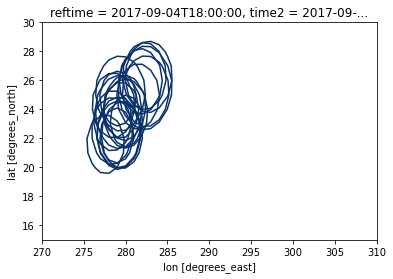

In [40]:
# Quick plot of SLP 990hPa contour, and find minimum values
SLPmins = []

for iens in range(21):
    SLP = landfall.Pressure_reduced_to_MSL_msl_ens[iens]
    contours = SLP.plot.contour(cmap='Blues', vmin=99000,vmax=99000,levels=1)
    #print('min value: ', SLP.min().values/100.)
    SLPmins.append(SLP.min().values/100.) 
SLPmins

# Another measure: EOF(lat,lon)PC(ens) decomposition

Text(0.5, 0, 'ens. member')

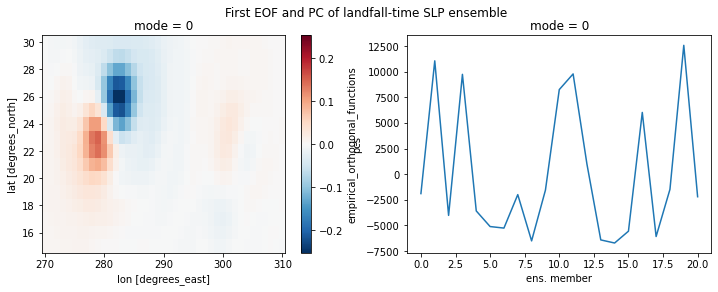

In [53]:
# EOFs of the landfall-time SLP field. Have to rename "ens" to "time" dimension
from eofs.xarray import Eof
solver = Eof( landfall.Pressure_reduced_to_MSL_msl_ens.rename({'ens':'time'}) )
pc = solver.pcs(npcs=1)  #, pcscaling=1)
eof = solver.eofs(neofs=1)

# Depict  it:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('First EOF and PC of landfall-time SLP ensemble')
eof.plot(ax=axes[0])
pc.plot(ax=axes[1]); plt.xlabel('ens. member')

In [54]:
roi['Pressure_reduced_to_MSL_msl_ens']

<xarray.DataArray 'Pressure_reduced_to_MSL_msl_ens' (time2: 65, ens: 21,
                                                     lat: 16, lon: 41)>
[895440 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 30.0 29.0 28.0 27.0 26.0 ... 19.0 18.0 17.0 16.0 15.0
  * lon      (lon) float32 270.0 271.0 272.0 273.0 ... 307.0 308.0 309.0 310.0
    reftime  datetime64[ns] 2017-09-04T18:00:00
  * time2    (time2) datetime64[ns] 2017-09-04T18:00:00 ... 2017-09-20T18:00:00
  * ens      (ens) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    long_name:                      Pressure reduced to MSL @ Mean sea level
    units:                          Pa
    abbreviation:                   PRMSL
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-3-1_L101
    Grib2_Parameter:                [0 3 1]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Pressure reduced to MSL
    Grib2_Level_Type:               101
    Grib2_Level_Desc:               Mean sea level
    Grib2_Generating_Process_Type:  Ensemble forecast

In [60]:
pc[:,0]

<xarray.DataArray 'pcs' (time: 21)>
array([-1897.1465, 11063.171 , -4024.381 ,  9744.732 , -3590.1406,
       -5113.6675, -5263.8013, -1998.0217, -6513.724 , -1556.5509,
        8257.013 ,  9786.715 ,   980.1604, -6418.5566, -6721.0005,
       -5567.3164,  6027.434 , -6086.485 , -1482.7742, 12577.276 ,
       -2202.787 ], dtype=float32)
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    mode     int64 0

In [64]:
xr.DataArray(SLPmins)

<xarray.DataArray (dim_0: 21)>
array([967.54242187, 962.74921875, 964.20742188, 966.8325    ,
       969.52578125, 973.8371875 , 979.9675    , 981.8496875 ,
       971.484375  , 969.56265625, 968.40304687, 963.304375  ,
       958.01265625, 968.04078125, 978.94078125, 976.07421875,
       968.4534375 , 972.15039062, 976.78054688, 957.11546875,
       980.18007813])
Dimensions without coordinates: dim_0

In [66]:
# Correlation of SLP AT ALL TIMES with LANDFALL measure 

# measure: Mode amplitude
pccor = xr.corr(pc[:,0], roi['Pressure_reduced_to_MSL_msl_ens'], dim="ens")
pccor

<xarray.DataArray (time: 21, time2: 65, lat: 16, lon: 41)>
array([[[[-2.18831642e-04, -1.99528996e-04, -7.48758781e-05, ...,
          -2.21399151e-04, -7.59921249e-05, -1.38817704e-04],
         [-3.04733722e-04, -6.76023912e-05,  6.07938447e-05, ...,
           2.20794242e-04, -4.89059958e-05, -1.40969474e-04],
         [-4.21047737e-05,  5.24636338e-05, -1.18379047e-04, ...,
          -1.92083401e-05, -1.01470412e-04, -1.26605563e-05],
         ...,
         [ 1.09544007e-04,  9.85310376e-05,  1.50059548e-04, ...,
          -1.27880858e-04, -3.48518749e-04,  1.23608585e-04],
         [ 1.23426392e-04, -2.92611838e-05,  1.21385329e-04, ...,
          -1.38599099e-04,  1.60669225e-04,  0.00000000e+00],
         [-4.99262345e-05, -2.32830313e-04,  1.47000179e-05, ...,
           7.00890908e-05, -2.58248544e-04,  0.00000000e+00]],

        [[-1.05648732e-04,  1.93375761e-04, -1.01932868e-04, ...,
          -1.03874618e-04, -1.19756008e-04,  3.23099390e-05],
         [-8.77751832e-05,  1.78000744e-04, -2.79858359e-05, ...,
          -3.99921375e-05,  1.77117453e-05, -1.21646165e-05],
         [ 1.34028373e-04, -1.52378379e-04, -1.00050228e-04, ...,
           8.56044493e-05,  1.16881768e-04,  1.73222753e-04],
...
         [-2.98867877e-05, -7.32124606e-05,  3.10321509e-05, ...,
           4.65387590e-05,  2.51228314e-05, -5.39878932e-06],
         [ 2.51025798e-05, -6.30862369e-05, -2.43713857e-05, ...,
          -6.03245858e-05, -6.20049239e-05, -1.69176710e-05],
         [-4.15827119e-05, -2.97957721e-05, -2.86136044e-05, ...,
          -2.59716458e-05,  3.16166013e-05,  1.18693721e-05]],

        [[ 5.81345408e-05,  3.26721790e-05, -3.08020453e-06, ...,
          -1.90245268e-05,  2.23346039e-05,  7.29685280e-07],
         [ 1.77753202e-05,  3.20350269e-05, -1.58449880e-06, ...,
           1.78506315e-05, -8.66053278e-06,  6.12824713e-06],
         [ 1.77319523e-05, -7.98163222e-06,  2.36368822e-05, ...,
           1.09674594e-05, -5.54712941e-06,  1.20336098e-05],
         ...,
         [-5.91480942e-06, -1.14794999e-04, -2.47956924e-05, ...,
           7.43659721e-06,  6.00505535e-05, -5.33043833e-05],
         [ 1.88547616e-05, -1.25753187e-05, -1.43099060e-05, ...,
           2.15423520e-05,  3.15303359e-05,  1.32734977e-05],
         [-9.71219771e-06,  8.63574891e-05,  4.00130661e-05, ...,
          -9.60527741e-06, -6.25422238e-06, -3.85186982e-05]]]])
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    mode     int64 0
  * lat      (lat) float32 30.0 29.0 28.0 27.0 26.0 ... 19.0 18.0 17.0 16.0 15.0
  * lon      (lon) float32 270.0 271.0 272.0 273.0 ... 307.0 308.0 309.0 310.0
    reftime  datetime64[ns] 2017-09-04T18:00:00
  * time2    (time2) datetime64[ns] 2017-09-04T18:00:00 ... 2017-09-20T18:00:00

In [67]:
# measure: SLPmins. Have to make it a DataArray with dimesnion called "ens" 
SLPcor =xr.corr(xr.DataArray(SLPmins), roi['Pressure_reduced_to_MSL_msl_ens'], dim="ens")

SLPcor

<xarray.DataArray (dim_0: 21, time2: 65, lat: 16, lon: 41)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
         [-2.98867877e-05, -7.32124606e-05,  3.10321509e-05, ...,
           4.65387590e-05,  2.51228314e-05, -5.39878932e-06],
         [ 2.51025798e-05, -6.30862369e-05, -2.43713857e-05, ...,
          -6.03245858e-05, -6.20049239e-05, -1.69176710e-05],
         [-4.15827119e-05, -2.97957721e-05, -2.86136044e-05, ...,
          -2.59716458e-05,  3.16166013e-05,  1.18693721e-05]],

        [[ 5.81345408e-05,  3.26721790e-05, -3.08020453e-06, ...,
          -1.90245268e-05,  2.23346039e-05,  7.29685280e-07],
         [ 1.77753202e-05,  3.20350269e-05, -1.58449880e-06, ...,
           1.78506315e-05, -8.66053278e-06,  6.12824713e-06],
         [ 1.77319523e-05, -7.98163222e-06,  2.36368822e-05, ...,
           1.09674594e-05, -5.54712941e-06,  1.20336098e-05],
         ...,
         [-5.91480942e-06, -1.14794999e-04, -2.47956924e-05, ...,
           7.43659721e-06,  6.00505535e-05, -5.33043833e-05],
         [ 1.88547616e-05, -1.25753187e-05, -1.43099060e-05, ...,
           2.15423520e-05,  3.15303359e-05,  1.32734977e-05],
         [-9.71219771e-06,  8.63574891e-05,  4.00130661e-05, ...,
          -9.60527741e-06, -6.25422238e-06, -3.85186982e-05]]]])
Coordinates:
  * lat      (lat) float32 30.0 29.0 28.0 27.0 26.0 ... 19.0 18.0 17.0 16.0 15.0
  * lon      (lon) float32 270.0 271.0 272.0 273.0 ... 307.0 308.0 309.0 310.0
    reftime  datetime64[ns] 2017-09-04T18:00:00
  * time2    (time2) datetime64[ns] 2017-09-04T18:00:00 ... 2017-09-20T18:00:00
Dimensions without coordinates: dim_0

In [ ]:
# let's take the 30th time level so the values differ substantially
ds_ens.Pressure_reduced_to_MSL_msl_ens[30]

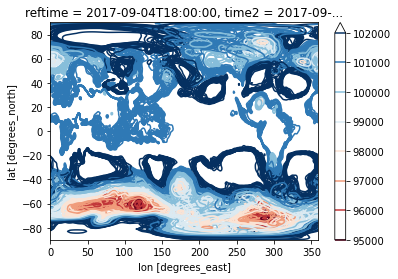

In [87]:
# spaghetti plot at lead time 20 steps (5 days)
for iens in range(21):
    contours = ds_ens.Pressure_reduced_to_MSL_msl_ens[20][iens].plot.contour(cmap='RdBu',vmin=95000,vmax=102000,levels=8)
    
plt.colorbar(contours)

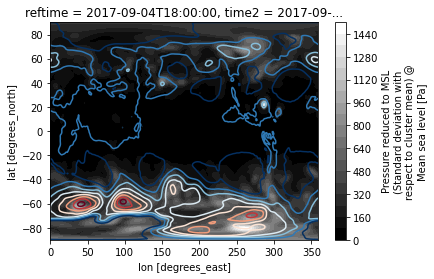

In [83]:
# Mean and standard deviation
ds_der.Pressure_reduced_to_MSL_msl_stdDev[15].plot.contourf(levels=25, cmap='gray')
ds_der.Pressure_reduced_to_MSL_msl_unweightedMean[15].plot.contour(cmap='RdBu',vmin=95000,vmax=102000,levels=8)

In [22]:
ds_der = xr.open_dataset(URLder)
ds_der

<xarray.Dataset>
Dimensions:                                                                         (
                                                                                     lat: 181,
                                                                                     lon: 360,
                                                                                     time: 64,
                                                                                     time_bounds_1: 2,
                                                                                     time1: 2,
                                                                                     ...
                                                                                     height_above_ground: 1,
                                                                                     isobaric1: 12,
                                                                                     depth_below_surface_layer: 1,
                                                                                     depth_below_surface_layer_bounds_1: 2,
                                                                                     height_above_ground1: 1,
                                                                                     isobaric2: 10)
Coordinates: (12/13)
  * lat                                                                             (lat) float32 ...
  * lon                                                                             (lon) float32 ...
    reftime                                                                         datetime64[ns] ...
  * time                                                                            (time) datetime64[ns] ...
  * time1                                                                           (time1) datetime64[ns] ...
  * time2                                                                           (time2) datetime64[ns] ...
    ...                                                                              ...
  * isobaric                                                                        (isobaric) float32 ...
  * height_above_ground                                                             (height_above_ground) float32 ...
  * isobaric1                                                                       (isobaric1) float32 ...
  * depth_below_surface_layer                                                       (depth_below_surface_layer) float32 ...
  * height_above_ground1                                                            (height_above_ground1) float32 ...
  * isobaric2                                                                       (isobaric2) float32 ...
Dimensions without coordinates: time_bounds_1,
                                pressure_difference_layer_bounds_1,
                                depth_below_surface_layer_bounds_1
Data variables: (12/74)
    LatLon_Projection                                                               int32 ...
    time_bounds                                                                     (time, time_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                                (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    depth_below_surface_layer_bounds                                                (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    Convective_available_potential_energy_pressure_difference_layer_stdDev          (time2, pressure_difference_layer, lat, lon) float32 ...
    Convective_available_potential_energy_pressure_difference_layer_unweightedMean  (time2, pressure_difference_layer, lat, lon) float32 ...
    ...                                                                              ...
    u-component_of_wind_isobaric_stdDev                                             (time2, isobaric1, lat, lon) float